# Eigenmodes

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from post_processing import eigen as eigproc

def filter_sort_eig(eigvals, eigfuns):
    # Filter the slow-decaying modes (these are usually the non-spurious ones)
    idx_filtered = np.abs(np.imag(eigvals)) > 0.5*np.abs(np.real(eigvals))
    eigvals = eigvals[idx_filtered]
    eigfuns = eigfuns[:, idx_filtered]
    # Sort by real part, and then by imaginary part
    idx_sorted = sorted(list(range(eigvals.size)), key=lambda i: (-np.real(eigvals[i]), np.abs(np.imag(eigvals[i]))))
    eigvals = eigvals[idx_sorted]
    eigfuns = eigfuns[:, idx_sorted]
    return eigvals, eigfuns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot eigenmodes - FEM

In [66]:
with h5py.File("./output/eigenmodes_Pm0_n50_full.h5", 'r') as f:
    xcoord = f["nodes"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

eigvals, eigfuns = eigproc.filter_sort_eig(eigvals, eigfuns)

In [67]:
eigvals[:50]

array([-0.0168149 -0.68674455j, -0.0168149 +0.68674455j,
       -0.07770794+0.83301073j, -0.07770794-0.83301073j,
       -0.15049224-1.03721565j, -0.15049224+1.03721565j,
       -0.2299879 +1.2749351j , -0.2299879 -1.2749351j ,
       -0.31424034+1.53317572j, -0.31424034-1.53317572j,
       -0.40321538+1.80450702j, -0.40321538-1.80450702j,
       -0.49786051-2.08452083j, -0.49786051+2.08452083j,
       -0.60054287-2.37072641j, -0.60054287+2.37072641j,
       -0.71869858+2.66379362j, -0.71869858-2.66379362j,
       -0.86066918+3.02454211j, -0.86066918-3.02454211j,
       -0.90675831-3.36802353j, -0.90675831+3.36802353j,
       -0.96783898+3.69026586j, -0.96783898-3.69026586j,
       -0.97213156-2.88614705j, -0.97213156+2.88614705j,
       -1.03339282-4.01577562j, -1.03339282+4.01577562j,
       -1.10144781-4.34931315j, -1.10144781+4.34931315j,
       -1.17205975-4.69240124j, -1.17205975+4.69240124j,
       -1.24559919-5.04544539j, -1.24559919+5.04544539j,
       -1.32242374-5.40852442j,

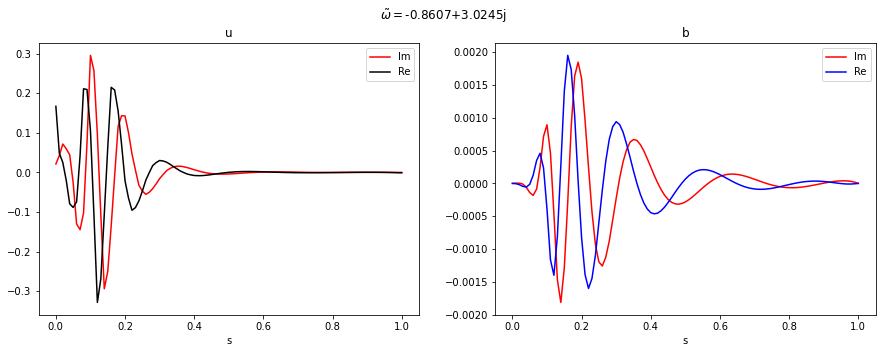

In [68]:
idx = 18

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Plot eigenmodes - Spectral

In [8]:
import scipy.special as specfun
from spectral import basis

with h5py.File("./output/eigenmodes_Pm0_cheby50.h5", 'r') as f:
    degrees = f["degrees"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

eigvals, eigfuns = filter_sort_eig(eigvals, eigfuns)

In [9]:
eigvals[:50]

array([-0.01679284+0.68673024j, -0.01679284-0.68673024j,
       -0.07752279-0.83286503j, -0.07752279+0.83286503j,
       -0.14996108-1.03676239j, -0.14996108+1.03676239j,
       -0.22894237-1.27399302j, -0.22894237+1.27399302j,
       -0.31252743-1.53161768j, -0.31252743+1.53161768j,
       -0.40069261-1.80224367j, -0.40069261+1.80224367j,
       -0.4947876 -2.0816243j , -0.4947876 +2.0816243j ,
       -0.60052979+2.36919843j, -0.60052979-2.36919843j,
       -0.72428099+2.7167497j , -0.72428099-2.7167497j ,
       -0.74920069-3.05515996j, -0.74920069+3.05515996j,
       -0.78423279+3.37297085j, -0.78423279-3.37297085j,
       -0.81902865-3.69956765j, -0.81902865+3.69956765j,
       -0.84815603-2.60623356j, -0.84815603+2.60623356j,
       -0.85697003-4.04043518j, -0.85697003+4.04043518j,
       -0.89526077+4.39478742j, -0.89526077-4.39478742j,
       -0.93725501-4.76680225j, -0.93725501+4.76680225j,
       -0.98225748+5.15229593j, -0.98225748-5.15229593j,
       -1.03040398-5.5572355j ,

In [10]:
xi = np.linspace(-1, 1, num=100)
cheby_eval = basis.ChebyshevTSpace(np.arange(50), xi)
eigenmodes_u = np.array([cheby_eval(eigfuns[:50, i]) for i in range(74)])
eigenmodes_b = np.array([cheby_eval(eigfuns[50:, i]) for i in range(74)])

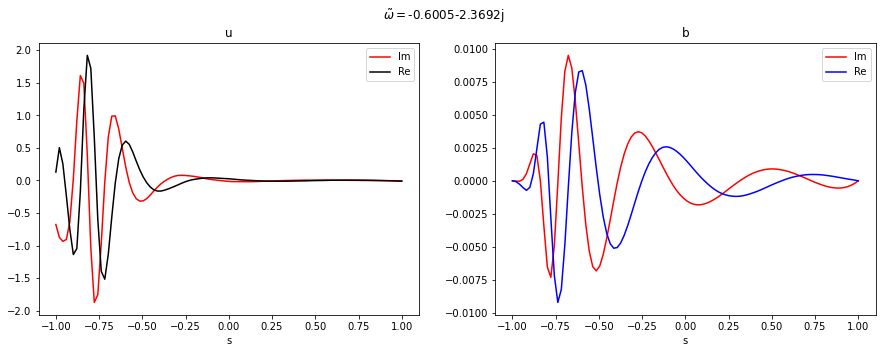

In [11]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xi, np.imag(eigenmodes_u[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_u[idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xi, np.imag(eigenmodes_b[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_b[idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

### Spectrum plot

Coefficient squared, without the kernel

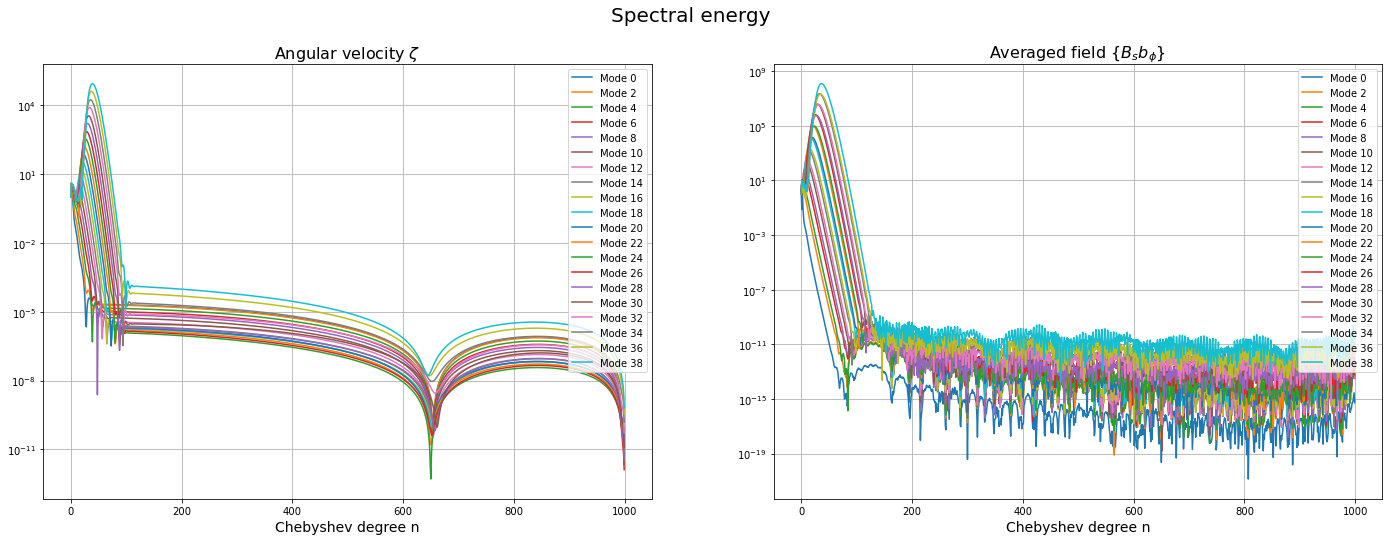

In [36]:
save_pict = True

cheby_deg = 1000
u_coeffs = eigfuns[:cheby_deg, :]
b_coeffs = eigfuns[cheby_deg:, :]

# Convert to modulus squared
u_coeffs = np.abs(u_coeffs)**2
b_coeffs = np.abs(b_coeffs)**2

# Normalize by leading Tn coefficient
u_coeffs = u_coeffs/np.abs(u_coeffs[0, :])
b_coeffs = b_coeffs/np.abs(b_coeffs[0, :])

# Normalize by maximum coefficient
# u_coeffs = u_coeffs/np.max(np.abs(u_coeffs), axis=0)
# b_coeffs = b_coeffs/np.max(np.abs(b_coeffs), axis=0)

n_modes = 20

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

ax = axes[0]
lines = ax.semilogy(np.abs(u_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Angular velocity $\zeta$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

ax = axes[1]
lines = ax.semilogy(np.abs(b_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Averaged field $\{B_s b_\phi\}$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

fig.suptitle("Spectral energy", fontsize=20)
if save_pict:
    plt.savefig("./output/eigenmodes_Pm0_cheby1000_quadpt/energy_spectrum.png", format="png", dpi=150, bbox_inches="tight")
plt.show()

### Energy kernel

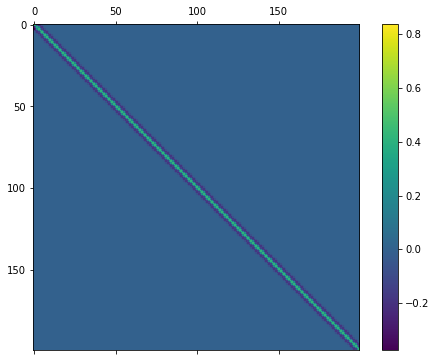

In [31]:
xi = np.linspace(-1, 1, num=200)
cheby_eval = basis.ChebyshevTSpace(np.arange(cheby_deg), xi)
ker = cheby_eval.kernel(lambda x: np.pi/2**4*(1 + x)**3*np.sqrt(3 + x), int_degree=6, jacobi_idx=(+1/2, 0))

fig, ax = plt.subplots(figsize=(8, 6))
cm = ax.matshow(ker)
# cm = ax.matshow(np.ma.array(ker, mask=np.abs(ker) < 1e-7))
plt.colorbar(cm)
plt.savefig("./output/eigenmodes_Pm0_cheby200_quadpt/energy_kernel.png", format='png', dpi=150, bbox_inches="tight")
plt.show()

## Eigenmode tracking

### Spectral

In [21]:
from post_processing import eigen as eigen_post

idx_track_spec, eigenval_track_spec = eigen_post.track_eigenvalues(["./output/eigenmodes_Pm0_cheby50.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby100.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby200.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby500.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby1000.h5"], k=50, reverse_track=True)

cheby_deg = np.array([50, 100, 200, 500, 1000])
total_dof = 2*cheby_deg

C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:46: UserWarning: Non-monotonic eigenvalue difference - potential non-convergence
  warnings.warn("Non-monotonic eigenvalue difference - potential non-convergence")
C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:44: UserWarning: Large discrepancies
  warnings.warn("Large discrepancies")


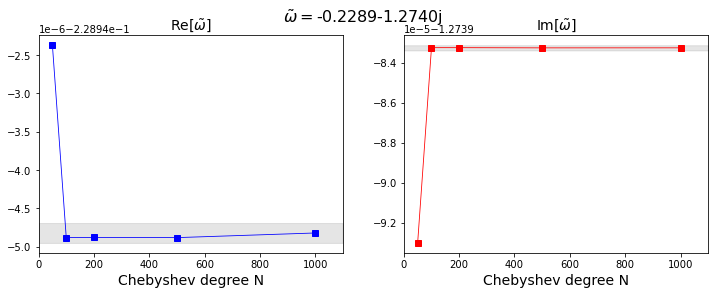

In [92]:
eig_idx = 6
single_prec_err = np.abs(eigenval_track_spec[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(cheby_deg, np.real(eigenval_track_spec[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_spec[eig_idx]).max() - np.real(eigenval_track_spec[eig_idx]).min()
# ax.set_ylim([np.real(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(cheby_deg, np.imag(eigenval_track_spec[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_spec[eig_idx]).max() - np.imag(eigenval_track_spec[eig_idx]).min()
# ax.set_ylim([np.imag(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_spec[eig_idx][-1]), fontsize=16)
plt.show()

### Finite-Element

In [74]:
idx_track_fem, eigenval_track_fem = eigen_post.track_eigenvalues(["./output/eigenmodes_Pm0_n50_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n100_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n200_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n500_full.h5"], k=50, reverse_track=True)

C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:46: UserWarning: Non-monotonic eigenvalue difference - potential non-convergence
  warnings.warn("Non-monotonic eigenvalue difference - potential non-convergence")
C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:44: UserWarning: Large discrepancies
  warnings.warn("Large discrepancies")


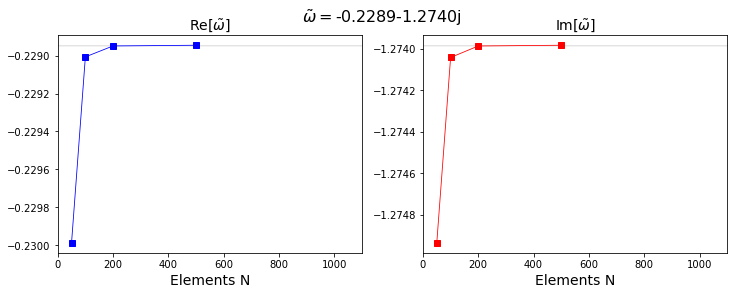

In [93]:
n_elem = np.array([50, 100, 200, 500])
total_dof_fem = 4*n_elem

eig_idx = 6
single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(n_elem, np.real(eigenval_track_fem[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_fem[eig_idx]).max() - np.real(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.real(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(n_elem, np.imag(eigenval_track_fem[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_fem[eig_idx]).max() - np.imag(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.imag(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_fem[eig_idx][-1]), fontsize=16)
plt.show()

### Convergence comparison

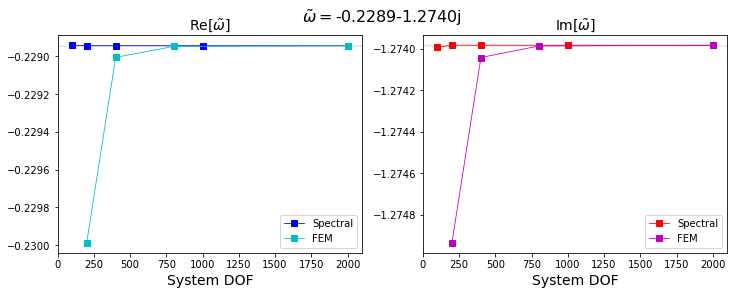

In [86]:
total_dof_fem = 4*n_elem

eig_idx = 6
single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

spec_vals = eigenval_track_spec[eig_idx]
if np.allclose(spec_vals[-1], eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = eigenval_track_fem[eig_idx]
elif np.allclose(np.conj(spec_vals[-1]), eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = np.conj(eigenval_track_fem[eig_idx])
else:
    print("The two eigenmodes seem to be different, searching the closest mode instead")
    eig_idx_fem = np.argmin(np.abs(eigenval_track_fem[:, -1] - spec_vals[-1]))
    fem_vals = eigenval_track_fem[eig_idx_fem]
    print("Use {:d}-th eigenvalue of FEM; finest FEM solution = {:.4f}".format(eig_idx_fem, fem_vals[-1]))

ax = axes[0]
ax.plot(total_dof, np.real(spec_vals), 's-b', linewidth=0.8, label="Spectral")
ax.plot(total_dof_fem, np.real(fem_vals), 's-c', linewidth=0.8, label="FEM")
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.real(spec_vals[-1]) - single_prec_err, np.real(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.real(spec_vals).min(), np.real(fem_vals).min()]), 
          max([np.real(spec_vals).max(), np.real(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

ax = axes[1]
ax.plot(total_dof, np.imag(spec_vals), 's-r', linewidth=0.8, label="Spectral")
ax.plot(total_dof_fem, np.imag(fem_vals), 's-m', linewidth=0.8, label="FEM")
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.imag(spec_vals[-1]) - single_prec_err, np.imag(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.imag(spec_vals).min(), np.imag(fem_vals).min()]), 
          max([np.imag(spec_vals).max(), np.imag(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(spec_vals[-1]), fontsize=16)
plt.show()

## Compare eigenmodes

In [96]:
with h5py.File("./output/eigenmodes_Pm0_cheby200.h5", 'r') as f:
    eigen_0 = f["eigenvals"][()]
    eigfuns_0 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_cheby200_v2.h5", 'r') as f:
    eigen_1 = f["eigenvals"][()]
    eigfuns_1 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_cheby1000.h5", 'r') as f:
    eigen_2 = f["eigenvals"][()]
    eigfuns_2 = f["eigenfuns"][()]

eigen_0, eigfuns_0 = filter_sort_eig(eigen_0, eigfuns_0)
eigen_1, eigfuns_1 = filter_sort_eig(eigen_1, eigfuns_1)
eigen_2, eigfuns_2 = filter_sort_eig(eigen_2, eigfuns_2)

for i in range(50):
    print("{:.10e} {:.10e} {:.10e}".format(eigen_0[i], eigen_1[i], eigen_2[i]))

-1.6792834917e-02-6.8673025095e-01j -1.6792834907e-02+6.8673025095e-01j -1.6792848358e-02-6.8673023383e-01j
-1.6792834917e-02+6.8673025095e-01j -1.6792834907e-02-6.8673025095e-01j -1.6792848358e-02+6.8673023383e-01j
-7.7522619589e-02+8.3286518671e-01j -7.7522619531e-02+8.3286518667e-01j -7.7522569858e-02-8.3286523772e-01j
-7.7522619589e-02-8.3286518671e-01j -7.7522619531e-02-8.3286518667e-01j -7.7522569858e-02+8.3286523772e-01j
-1.4995918891e-01-1.0367617579e+00j -1.4995918906e-01-1.0367617579e+00j -1.4995926577e-01-1.0367617237e+00j
-1.4995918891e-01+1.0367617579e+00j -1.4995918906e-01+1.0367617579e+00j -1.4995926577e-01+1.0367617237e+00j
-2.2894487816e-01-1.2739832518e+00j -2.2894487808e-01-1.2739832519e+00j -2.2894481967e-01-1.2739832602e+00j
-2.2894487816e-01+1.2739832518e+00j -2.2894487808e-01+1.2739832519e+00j -2.2894481967e-01+1.2739832602e+00j
-3.1257001038e-01+1.5316223016e+00j -3.1257001039e-01-1.5316223013e+00j -3.1257004409e-01-1.5316223099e+00j
-3.1257001038e-01-1.53162230

In [97]:
K_vec = np.load("./output/K_mat_vectorized.npy")
M_vec = np.load("./output/M_mat_vectorized.npy")
K_seq = np.load("./output/K_mat_sequential.npy")
M_seq = np.load("./output/M_mat_sequential.npy")

(array([1.1322e+04, 3.9900e+02, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.4000e+01, 1.9980e+03, 4.2470e+03, 5.1800e+02]),
 array([-16.25560868, -15.35174842, -14.44788817, -13.54402791,
        -12.64016766, -11.7363074 , -10.83244715,  -9.92858689,
         -9.02472664,  -8.12086638,  -7.21700613,  -6.31314588,
         -5.40928562,  -4.50542537,  -3.60156511,  -2.69770486]),
 <BarContainer object of 15 artists>)

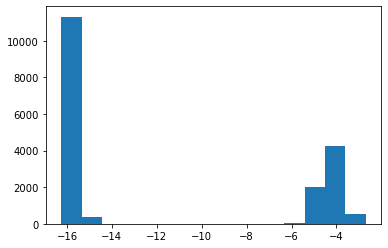

In [125]:
K_diff = K_seq - K_vec
plt.hist(np.log10(np.abs(K_diff[np.abs(K_diff) > 1e-14])/(np.abs(K_seq) + np.abs(K_vec))[np.abs(K_diff) > 1e-14]), bins=15)

C:\Users\gentle\AppData\Local\Temp\ipykernel_21720\2289815759.py:4: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)), mask=np.abs(K_diff) < 1e-14))
C:\Users\gentle\AppData\Local\Temp\ipykernel_21720\2289815759.py:9: RuntimeWarning: invalid value encountered in true_divide
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-14))
C:\Users\gentle\AppData\Local\Temp\ipykernel_21720\2289815759.py:9: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-14))


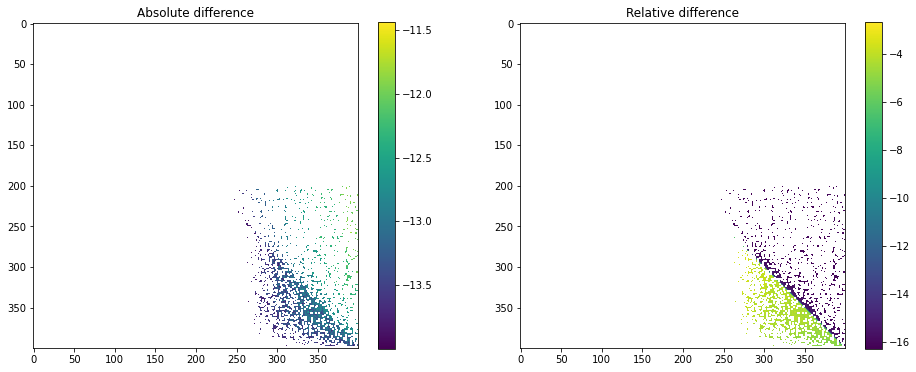

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax = axes[0]
cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)), mask=np.abs(K_diff) < 1e-14))
plt.colorbar(cm, ax=ax)
ax.set_title("Absolute difference")

ax = axes[1]
cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-14))
plt.colorbar(cm, ax=ax)
ax.set_title("Relative difference")

plt.show()

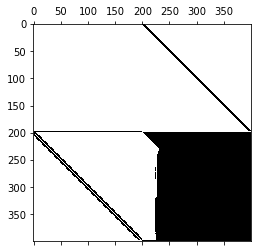

In [148]:
plt.spy(K_vec, precision=1e-12)

In [195]:
xi_quad, wt_quad = specfun.roots_chebyt(1000)
N_mesh, Xi_mesh = np.meshgrid(np.arange(1000), xi_quad, indexing='ij')
Tn = specfun.eval_chebyt(N_mesh, Xi_mesh)
dTn_dxi = N_mesh*specfun.eval_chebyu(N_mesh - 1, Xi_mesh)
dTn_dxi2 = N_mesh*((N_mesh + 1)*specfun.eval_chebyt(N_mesh, Xi_mesh) - specfun.eval_chebyu(N_mesh, Xi_mesh))/(Xi_mesh**2 - 1)

In [201]:
np.sum(wt_quad*Tn[700, :]*dTn_dxi[601, :]), np.sum(wt_quad*Tn[700, :]*dTn_dxi[600, :])

(-8.973002785239714e-09, -5.329070518200751e-15)